# **Data Analytics Project: Bike Sharing Dataset**

- **Name:** Muhammad Zidan Atsal
- **Email:** mzatsal19@gmail.com
- **Dicoding ID:** mzidanatsal11

## **Business Questions**


1.   Does the weather play a role in the number of bicycle users?
2.   What are the conditions when bicycles are used on working days, holidays, and weekdays?
3. What is the trend of bicycle usage in a year, is 2011 or 2012 the superior year?
4. How do variables such as temp and atemp and humidity affect the total number of bicycle users (both Casual and Registered)?
5. Is there an effect of seasonality on bicycle rentals based on Casual and Registered customers?



## **Import All the Packages/Library**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Wrangling**

### **Gathering Data**

At this stage we will collect the data that we have collected. Because I chose the Bike Sharing Dataset, I imported the day.csv and hr.csv files

#### **Load Day Table**

In [3]:
day_df = pd.read_csv('/content/drive/MyDrive/DICODING/Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### **Load Hour Table**

In [4]:
hr_df = pd.read_csv('/content/drive/MyDrive/DICODING/Bike-sharing-dataset/hour.csv')
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### **Assessing Data**

#### Assesing day_df

1. Checking the day_df data type

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


We can see that there is 1 data type based on the column that does not match. The data that needs to be corrected is: dteday --> datetime

2. Checking missing values

In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


We can conclude that the day_df table has no missing values and the data is safe to use.

3. Check for duplicated data

In [7]:
print("Amount of duplication data : ", day_df.duplicated().sum())

Amount of duplication data :  0


In the day_df table there is no duplicate data, meaning that all data is unique.

4. Checking for anomalies in the statistical values

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


We can see that there is nothing anomalous about the statistical values.

#### Assesing hr_df

1. Checking the day_df data type

In [9]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


We can see that there is 1 data type based on the column that does not match. The data that needs to be corrected is: dteday --> datetime

2. Checking missing values

In [10]:
hr_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


We can conclude that the hr_df table has no missing values and the data is safe to use.

3. Check for duplicated data

In [11]:
print("Amount of duplication data : ", hr_df.duplicated().sum())

Amount of duplication data :  0


In the hr_df table there is no duplicate data, meaning that all data is unique.

4. Checking for anomalies in the statistical values

In [12]:
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


We can see that there is nothing anomalous about the statistical values.

## **Cleaning Data**

1. Delete unnecessary tables

Before we go to the next steps, we will first delete the hr table. The reason for the deletion is because we are not relevant to the business question we have set, and also actually the hr and day tables are only different in the hr column.

In [13]:
del hr_df

2. Removing some columns that will not be used

Based on the existing business question, the columns that will be dropped are:

* Instant: Because this record index does not provide any additional useful information.
* Windspeed: There is no business question related to the effect of wind speed on the number of bike renters.

In [14]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


3. Changing some details about the columns

Because the names of the columns above are not appropriate and cannot be understood, we will change them. Also, with the categorical form, so some of the ones that were previously numbers will be changed. Lastly, if there was an inappropriate data type before, we will change it too.

In [15]:
# Change name of column
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [16]:
# Change the number into description
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [17]:
# Change data type into date time
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


## **Exploratory Data Analysis (EDA)**

### Explore day_df

Group bike renters (both casual and registered) by month

In [19]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-19-b05109ea9f0a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Based on the results above, it can be concluded that the month that has the largest average and the largest number is June. While the smallest average and smallest number is January.

2. Categorize bicycle renters (both casual and registered) based on weather conditions.

In [20]:
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-20-c87e0d584980>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather_cond').agg({


count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Based on the results above, it can be concluded that bicycle renters tend to rent during sunny or cloudy weather. Very few when it is snowing and none when the weather is very bad.

3. Grouping bike renters (both casual and registered) by holiday

In [21]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-21-6767227fada1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Based on the results above, it can be concluded that bicycle renters prefer to rent bicycles when it is not a holiday, but during weekdays.

4. Comparing bicycle renters on weekdays and weekends

In [22]:

day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

<ipython-input-22-7bfa45d53d30>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

Based on the results above, the order of the average number of tenants from largest to smallest is: Friday (Fri), Thursday (Thu), Saturday (Sat), Wednesday (Wed), Tuesday (Tue), Monday (Mon), and Sunday (Sun).

5. Categorize bike renters (both casual and registered) by workday

In [23]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

<ipython-input-23-fb984321fedb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Based on the results above, the largest number of bike rentals falls on working days compared to non-working days. However, we can also see that the results are quite different although not by much.

6. Categorize bike renters (both casual and registered) by season

In [24]:

day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})


<ipython-input-24-176def68a8e5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Based on the results of the analysis above, both Casual and Registered bicycle renters prefer the Fall season, as can be seen from the averages. While the least is in the spring (Spring) with the smallest average.

7. Classify temp, hum, and humidity by season

In [25]:

day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})


<ipython-input-25-0b30bfab3067>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

8. Relationship between casual, registered, and count tenants

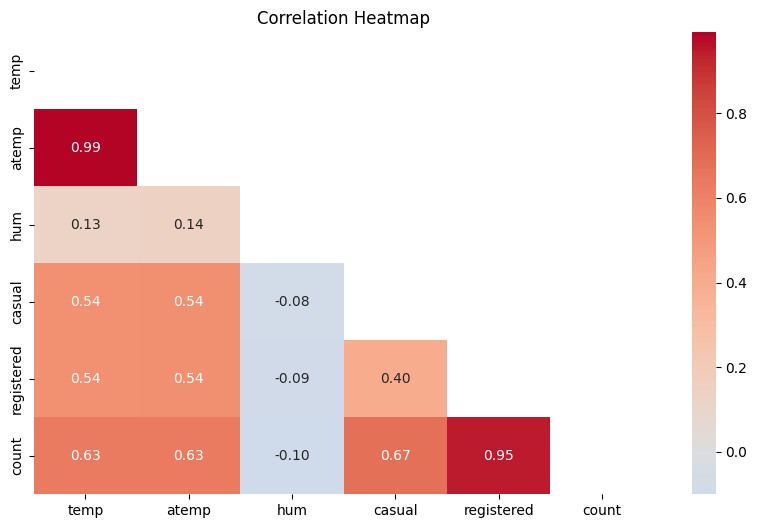

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Based on the results of the above analysis, the following statement is obtained:

* atemp and temp are highly correlated (0.99).
* hum has a weak correlation with temp and atemp (0.13 and 0.14).
* casual is moderately correlated with temp and atemp (0.54), and slightly negative with hum (-0.08).
* registered has the same pattern as casual, and is moderately correlated with casual (0.40).
* count is strongly correlated with temp, atemp, casual, and registered (0.63, 0.63, 0.67, and 0.95), and slightly negative with hum (-0.10).

## **Visualization & Explanatory Analysis**

#### **Question 1: Does the weather play a role in the number of bicycle users?**

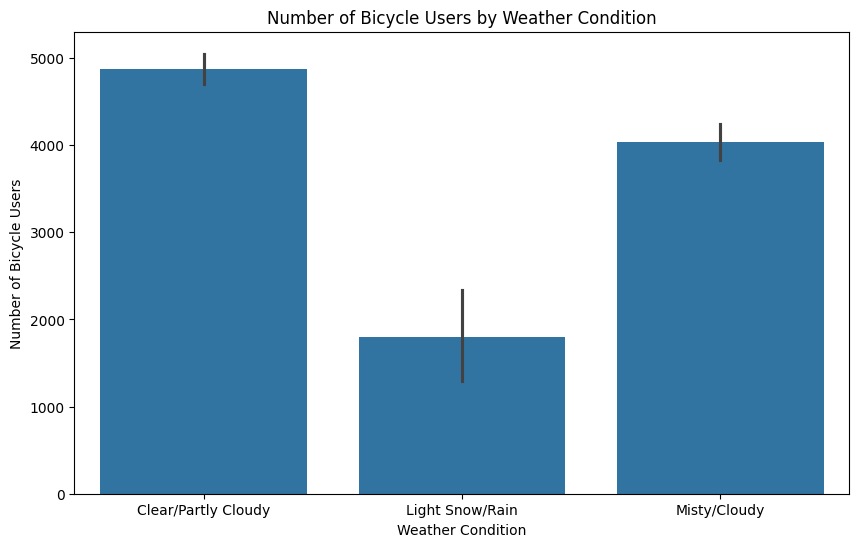

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='count',
    data=day_df)

plt.title('Number of Bicycle Users by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Bicycle Users')
plt.show()

Based on the visualization of the data using boxplots, it can be concluded that there is a clear relationship between weather conditions and bicycle renters. Weather conditions when it is sunny / half cloudy are the most popular conditions, followed by foggy / cloudy weather, and finally when the weather is a little snowy / rainy it is the least popular.

#### **Question 2: What are the conditions when bicycles are used on working days, holidays, and weekdays?**


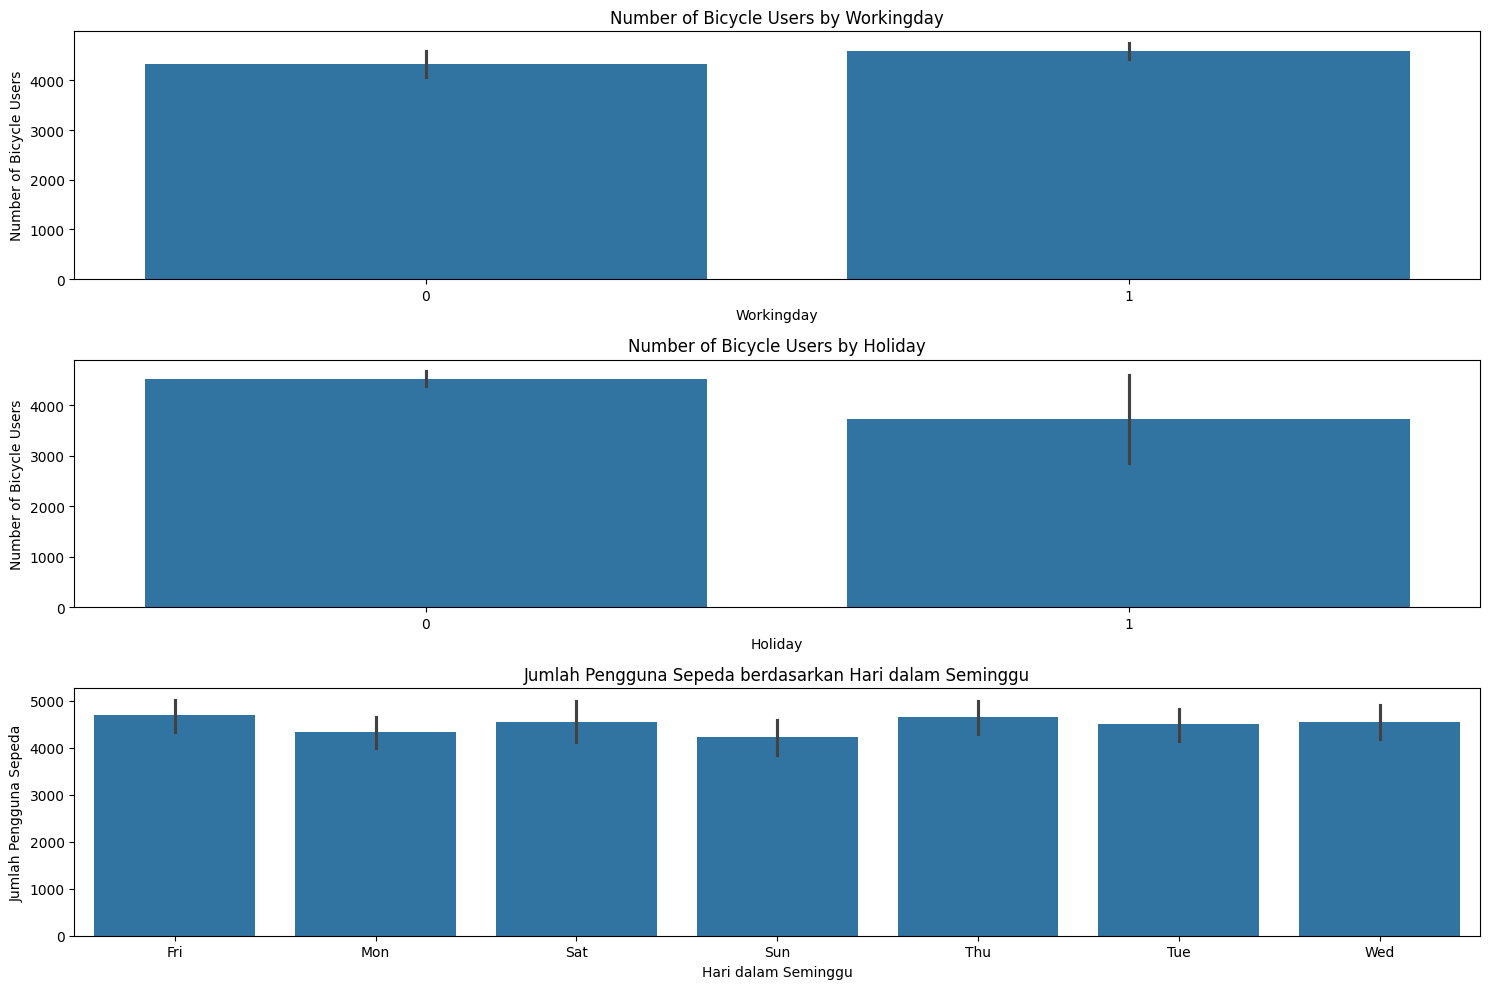

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Based on workingday
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    ax=axes[0])
axes[0].set_title('Number of Bicycle Users by Workingday')
axes[0].set_xlabel('Workingday')
axes[0].set_ylabel('Number of Bicycle Users')

# Based on holiday
sns.barplot(
  x='holiday',
  y='count',
  data=day_df,
  ax=axes[1])
axes[1].set_title('Number of Bicycle Users by Holiday')
axes[1].set_xlabel('Holiday')
axes[1].set_ylabel('Number of Bicycle Users')

# Based on weekday
sns.barplot(
  x='weekday',
  y='count',
  data=day_df,
  ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

Based on the data visualization above using barplots, the following statement is obtained:

* The number of bicycle renters is more on weekdays (i.e. Monday - Friday) than weekends (i.e. Saturday and Sunday). 0 indicates weekend and 1 indicates weekday.
* The number of bicycle renters is much higher on weekdays (non-holidays) than on holidays (national holidays).
* Friday is the day with the most bicycle renters, and Sunday is the day with the least number of bicycle renters.

#### **Question 3: What is the trend of bicycle usage in a year, is 2011 or 2012 the superior year?**

<ipython-input-29-2ab6b12d8d86>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["month","year"]).agg({
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


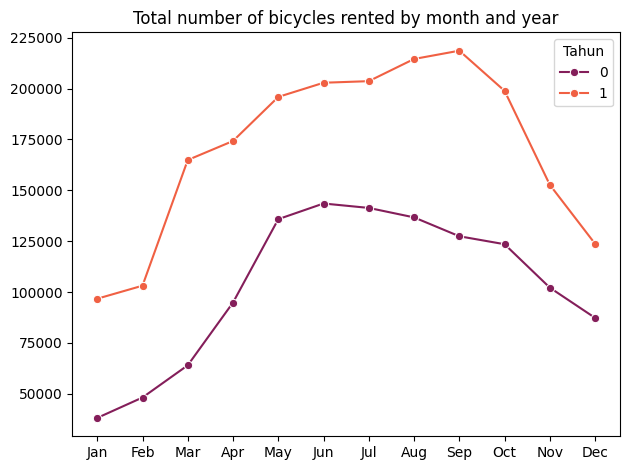

In [29]:

day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket",
    marker="o")

plt.title("Total number of bicycles rented by month and year")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()


Based on the visualization above using lineplot, it can be concluded that the year 2012 (represented by the number 1) clearly won the upper hand from January to December. The peak of bike rentals in 2012 occurred in September, while the quietest month occurred in January. Whereas in 2011 peak bike rentals occurred in June and had the least rentals in January.

#### **Question 4: How do variables such as temp and atemp and humidity affect the total number of bicycle users (both Casual and Registered)?**

Text(0.5, 1.0, 'Humidity vs Count')

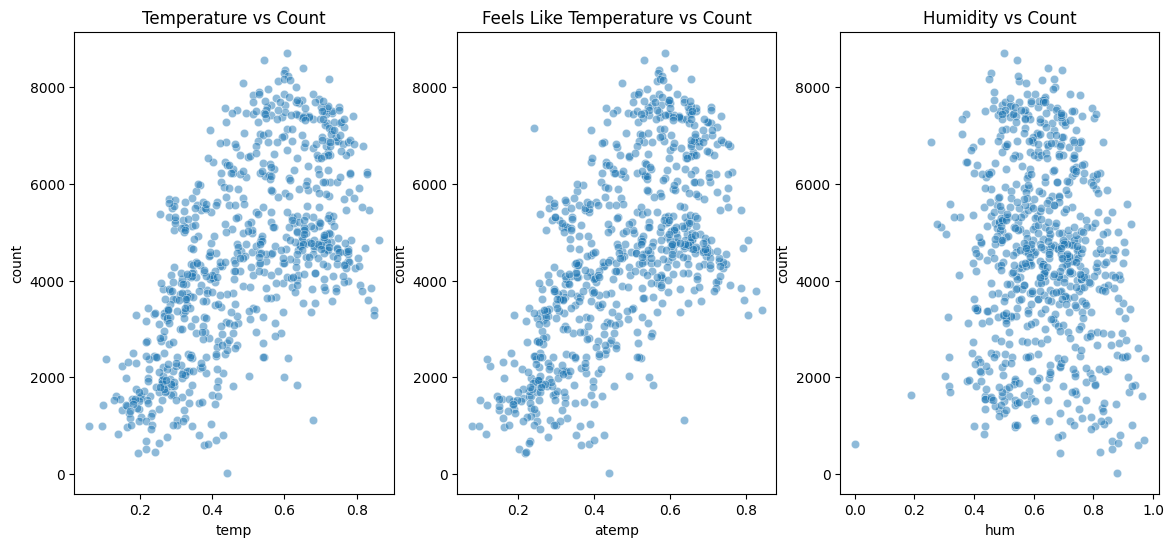

In [30]:
plt.figure(figsize=(14, 6))

# Scatter plot for 'temp' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='temp',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Temperature vs Count')

# Scatter plot for 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='atemp',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Feels Like Temperature vs Count')

# Scatter plot for 'hum' vs 'count'
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='hum',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Humidity vs Count')

Based on the results of the above analysis using the scatter plot, we can draw the following statements:

* The relationship between temp and count turns out to show a positive correlation between the two variables.
* The relationship between atemp and count also shows a positive correlation between the two variables.
* The relationship between hum and count turns out to show a slightly negative correlation, but it is not too significant because the lean to the left is not too noticeable.

In conclusion, if the temperature (temp and atemp) increases, then bicycle users also tend to increase. And the influence of humidity seems to be very small here, although it tends to reduce the number of bicycle users.

#### **Question 5: Is there an effect of seasonality on bicycle rentals based on Casual and Registered customers?**

<ipython-input-31-93af25d39f16>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()


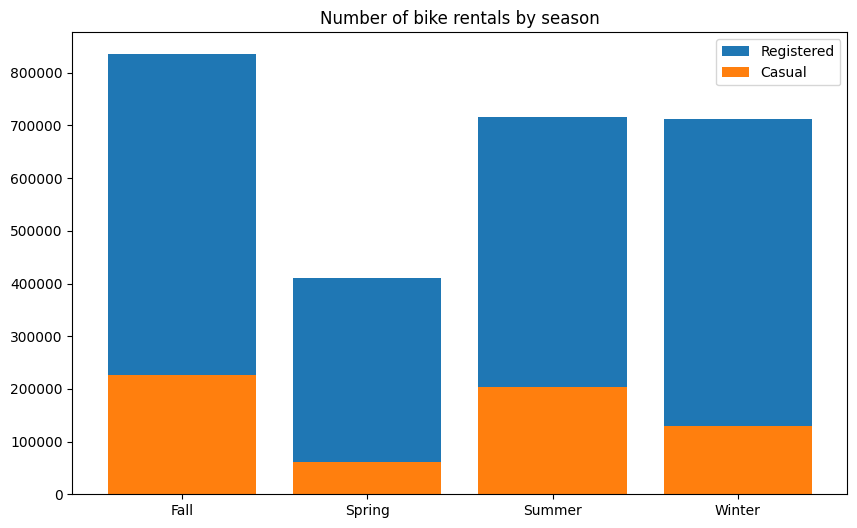

In [31]:
# Classify data by season and calculate the number of registered and unregistered uses
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of bike rentals by season')
plt.legend()
plt.show()

Based on the results of the above analysis using barplots, it can be concluded that across all seasons the most enjoyable season for cyclists (Casual and Registered) is Fall, followed by Summer, Winter, and ending with Spring.

## **Conclusion**

**Conclusion for Question 1:**  
It is clear that there is a relationship between the two. Bicycle renters prefer weather that is Clear/Partly Cloudy with Q3 above 6000, Q1 below 4000, and a median close to 5000. The second most preferred condition is when the weather is Foggy/Cloudy, with Q3 above 5000, Q1 below 3000, and a median above 4000. Lastly, users tend to dislike weather that is Slightly Snowy/Rainy, with Q3 above 2000, Q1 below 1000, and a median above 1000. There is no data for severe storms, as it is generally not feasible to cycle under such weather conditions.

**Conclusion for Question 2:**  
The conditions shown in the visualization are divided into three parts. For the number of bike users based on working days, working days slightly outperform non-working days, though the difference is not too significant. However, there is still a clear distinction, with both having over 4000 users. Based on holidays, non-holidays dominate with a more significant difference compared to holidays. This may indicate that users prefer to rent bikes on regular days. Lastly, based on weekdays, Friday ranks first with a mean of 4690.29, while Sunday is last with a mean of 4228.83.

**Conclusion for Question 3:**  
In this visualization, we can observe that in both 2011 and 2012, there were differences in peak and bottom months. The peak in 2011 was in June, with the lowest point in January. In 2012, the peak was in September, while the lowest point was still in January. From both visualizations, we can see that the total number of bikes rented in 2012 was higher overall than in 2011.

**Conclusion for Question 4:**  
From the three visualizations shown, it can be concluded that temp and atemp have a positive correlation with the count, meaning that as temperature (temp and atemp) increases, the number of bike users also tends to rise. This is in contrast with humidity, which has a negative correlation with the count, though it is very minimal (not very significant). However, it still slightly decreases the number of bike users as humidity increases.

**Conclusion for Question 5:**  
In the final visualization, the results are quite surprising, as winter did not rank last. Instead, spring came in last. This could be due to various factors such as weather conditions, air temperature, working days, holidays, etc. Fall ranked first, achieving over 800,000 bike rentals.